# BibRec: Training Random Forest Model

### Train Random Forest Model on all ratings
RF Features: Country, State, Age, Year-of-Publication, Publisher


In [1]:
# Specify where to save the model
model_file = "rf6-ex6.pkl"

In [2]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                            users_path='data/normalized_users.csv',
                                            ratings_path='data/normalized_ratings.csv')

/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:16: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:98: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [3]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,41.281036,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,55.495336,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,30.073997,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,13.021976,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,47.180327,brampton,ontario,canada,0.0,0.0
278856,278857,47.027960,knoxville,other,usa,0.0,0.0


In [4]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [5]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [6]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:50]
top_ratings = top_ratings.reset_index()
# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)
top_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780060928339
5,9780590353427
6,9780142001745
7,978044667227
8,9780440237228
9,9780452282155


In [7]:
top_ratings = top_ratings.merge(ratings, on='isbn13', how='inner')
top_ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780316666343,1.000000,277439,7
1,9780316666343,1.000000,277752,7
2,9780316666343,1.000000,278633,9
3,9780316666343,1.000000,638,10
4,9780316666343,1.000000,709,3
...,...,...,...,...
3425283,9780060934415,2.166667,267033,8
3425284,9780060934415,2.166667,273086,6
3425285,9780060934415,2.166667,273979,9
3425286,9780060934415,2.166667,274004,8


In [8]:
encoded_books = hot_encode_books(books)
encoded_books

hot encoding books


,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4,...,0,0,0,0,0,0,0,0,0,1
2,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14,...,0,0,0,0,0,0,0,0,0,1
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6,...,0,0,0,0,0,0,0,0,0,1
4,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17,...,0,0,0,0,0,0,0,0,0,1
270940,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14,...,0,0,0,0,0,0,0,0,0,1
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1,...,0,0,0,0,0,0,0,0,0,1
270942,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9,...,0,0,0,0,0,0,0,0,0,1


In [9]:
encoded_users = hot_encode_users(users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,41.281036,nyc,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,stockton,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55.495336,moscow,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,porto,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,30.073997,farnborough,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,13.021976,portland,7.0,6.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,tacoma,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,47.180327,brampton,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,47.027960,knoxville,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,9780195153446,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9780002005012,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780060973124,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780374157067,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780393045215,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270940,978052544763,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270941,9780060086671,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270942,9780192126047,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,41.281036,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55.495336,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,30.073997,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,13.021976,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,47.180327,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,47.027960,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780316666343,277439,7
1,9780316666343,277752,7
2,9780316666343,278633,9
3,9780316666343,638,10
4,9780316666343,709,3
...,...,...,...
3425283,9780060934415,267033,8
3425284,9780060934415,273086,6
3425285,9780060934415,273979,9
3425286,9780060934415,274004,8


In [13]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,277752,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780316666343,278633,9,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780316666343,638,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,709,3,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425283,9780060934415,267033,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3425284,9780060934415,273086,6,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3425285,9780060934415,273979,9,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3425286,9780060934415,274004,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [15]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425283,9780060934415,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3425284,9780060934415,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3425285,9780060934415,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3425286,9780060934415,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
Y

0           7
1           7
2           9
3          10
4           3
           ..
3425283     8
3425284     6
3425285     9
3425286     8
3425287    10
Name: book_rating, Length: 3425288, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [18]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Creating new model: rf6-ex6.pkl


In [19]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    4.9s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   16.5s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   23.4s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   35.2s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   48.1s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.1min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.4min


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  1.7min


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  2.1min


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  2.6min


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  3.1min


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  3.3min finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [20]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [21]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    6.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    7.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    8.4s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    9.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   10.5s finished


array([ 8,  8, 10, ...,  8, 10,  9])

In [22]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.90      0.87      0.88     15003
           2       0.81      0.82      0.81     18789
           3       0.90      0.86      0.88     24569
           4       0.90      0.88      0.89     23074
           5       0.90      0.89      0.89     73536
           6       0.88      0.87      0.87     67585
           7       0.88      0.87      0.88    150545
           8       0.90      0.90      0.90    242217
           9       0.88      0.88      0.88    200302
          10       0.88      0.91      0.89    211967

    accuracy                           0.89   1027587
   macro avg       0.88      0.87      0.88   1027587
weighted avg       0.89      0.89      0.89   1027587

88.59376383702791


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.6s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    6.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    7.2s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    8.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    9.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   10.6s finished


Confusion matrix, without normalization
[[ 13002    519    528      0    359    184      0    326      0     85]
 [   535  15336    186    427    237    370    438    824    255    181]
 [   334    555  21093    172    179    371    883    438    213    331]
 [   179    172    182  20230    240    249    355    821    500    146]
 [   178    739    651    192  65623    746   1070   1057   1834   1446]
 [   158    339      0    630    457  58647   1282   2194   1655   2223]
 [     0    557    434    171    874   1487 131575   4589   5829   5029]
 [     0    198     76    513   1697   1232   5616 217293   7499   8093]
 [     0    217    389     69   1521   2110   5380   7152 175487   7977]
 [     0    375      0    153   2075   1395   2861   6107   6909 192092]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    3.9s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.8s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    5.8s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    6.9s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    8.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    9.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   10.1s finished


Normalized confusion matrix
[[8.67e-01 3.46e-02 3.52e-02 0.00e+00 2.39e-02 1.23e-02 0.00e+00 2.17e-02
  0.00e+00 5.67e-03]
 [2.85e-02 8.16e-01 9.90e-03 2.27e-02 1.26e-02 1.97e-02 2.33e-02 4.39e-02
  1.36e-02 9.63e-03]
 [1.36e-02 2.26e-02 8.59e-01 7.00e-03 7.29e-03 1.51e-02 3.59e-02 1.78e-02
  8.67e-03 1.35e-02]
 [7.76e-03 7.45e-03 7.89e-03 8.77e-01 1.04e-02 1.08e-02 1.54e-02 3.56e-02
  2.17e-02 6.33e-03]
 [2.42e-03 1.00e-02 8.85e-03 2.61e-03 8.92e-01 1.01e-02 1.46e-02 1.44e-02
  2.49e-02 1.97e-02]
 [2.34e-03 5.02e-03 0.00e+00 9.32e-03 6.76e-03 8.68e-01 1.90e-02 3.25e-02
  2.45e-02 3.29e-02]
 [0.00e+00 3.70e-03 2.88e-03 1.14e-03 5.81e-03 9.88e-03 8.74e-01 3.05e-02
  3.87e-02 3.34e-02]
 [0.00e+00 8.17e-04 3.14e-04 2.12e-03 7.01e-03 5.09e-03 2.32e-02 8.97e-01
  3.10e-02 3.34e-02]
 [0.00e+00 1.08e-03 1.94e-03 3.44e-04 7.59e-03 1.05e-02 2.69e-02 3.57e-02
  8.76e-01 3.98e-02]
 [0.00e+00 1.77e-03 0.00e+00 7.22e-04 9.79e-03 6.58e-03 1.35e-02 2.88e-02
  3.26e-02 9.06e-01]]


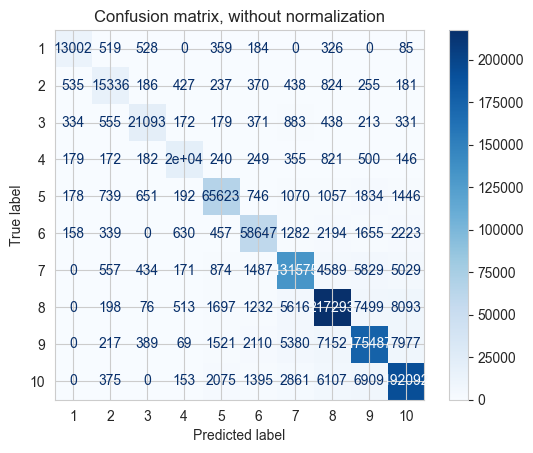

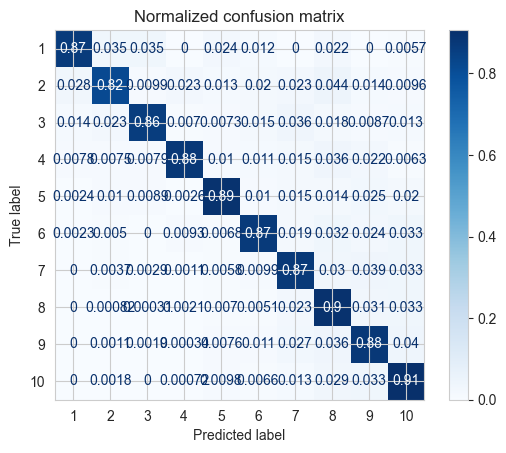

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    6.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    8.7s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   10.6s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   13.5s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   15.8s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   19.2s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   22.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   24.3s finished


0.8906623469732048

In [25]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.701877
1,normalized_year_of_publication,0.088827
0,isbn13,0.079851
65,state_other,0.010402
45,state_california,0.006438
...,...,...
10,publisher_berkley_publishing_group,0.000000
2,publisher_harlequin,0.000000
8,publisher_simon_&amp;_schuster,0.000000
6,publisher_bantam_books,0.000000


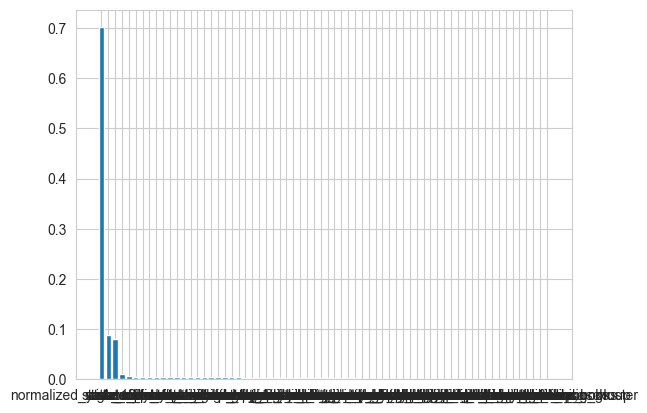

In [26]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [27]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
24,country_usa,0.004936
44,country_other,0.004566
25,country_canada,0.002750
29,country_australia,0.002244
27,country_germany,0.002234
26,country_united_kingdom,0.002185
41,country_malaysia,0.002059
32,country_portugal,0.001961
28,country_spain,0.001606
34,country_netherlands,0.001570


In [28]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.010402
45,state_california,0.006438
53,state_illinois,0.005184
60,state_massachusetts,0.004832
52,state_pennsylvania,0.004655
50,state_new_york,0.004497
56,state_ohio,0.004371
58,state_oregon,0.004324
57,state_michigan,0.004091
51,state_florida,0.004052


In [29]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
22,publisher_other,0.003712
7,publisher_scholastic,0.002188
9,publisher_penguin_books,0.001654
5,publisher_ballantine_books,0.001595
11,publisher_warner_books,0.001587
18,publisher_st._martin's_press,0.001103
4,publisher_pocket,0.000794
21,publisher_zebra_books,0.000000
20,publisher_harpercollins_publishers,0.000000
3,publisher_silhouette,0.000000


In [30]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.701877
Name: Importances, dtype: float64
country_importance: 0.034459111543886
state_importance: 0.08235465628718153
publisher_importance: 0.012631637658494784
